In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import JSON
from calendar import monthrange

import config as cfg


In [2]:
# get weather data for a particular city from startdate to enddate
def get_wwo_weather(city, startdate, enddate):
    params = {'q':city,
              'date': startdate,
              'enddate': enddate, 
              'tp':24, 
              'format': 'json',
              'key': cfg.WEATHER_KEY
             }
    url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"

    response = requests.get(url=url, params=params)
    if response.status_code == 200:
        return response.json()

        

In [3]:
response = get_wwo_weather('Lytton, Canada', '2021-12-01', '2021-12-15')

In [4]:
JSON(response)

<IPython.core.display.JSON object>

In [5]:
def parse_json_weather(response):
    """ Parses response from wwo_get_weather(). 
        Returns df with hourly weather from all dates in the the response """
    
    dates = range(len(response['data']['weather']))
    rows = []
    
    for index in dates:
        date = response['data']['weather'][index]['date']
        maxtempC = response['data']['weather'][index]['maxtempC']
        mintempC = response['data']['weather'][index]['mintempC']
        avgtempC = response['data']['weather'][index]['avgtempC']
        precip = response['data']['weather'][index]['hourly'][0]['precipMM']
        totalSnow_cm = response['data']['weather'][index]['totalSnow_cm']
        rows.append({'date': date, 
                    'maxtempC': maxtempC,
                    'mintempC': mintempC,
                    'avgtempC': avgtempC,
                    'precip': precip,
                    'totalSnow_cm': totalSnow_cm} )                              
        
    parsed_weather_df = pd.DataFrame(rows)
    return parsed_weather_df

In [6]:
parse_json_weather(response)

,date,maxtempC,mintempC,avgtempC,precip,totalSnow_cm
0,2021-12-01,3,1,3,3.1,0.0
1,2021-12-02,2,-4,1,2.8,0.3
2,2021-12-03,-3,-6,-4,0.2,0.1
3,2021-12-04,-3,-9,-5,1.3,1.0
4,2021-12-05,-5,-11,-8,0.3,0.3
5,2021-12-06,-5,-13,-7,1.6,1.4
6,2021-12-07,-1,-10,-5,0.0,0.0
7,2021-12-08,-0,-10,-3,3.0,2.2
8,2021-12-09,-5,-12,-8,0.0,0.0
9,2021-12-10,-5,-14,-9,0.0,0.0


In [7]:
def get_weather_data(start_year, cities):
    year = start_year
    df = pd.DataFrame()
    for city in cities:
        while year <= 2021:
            months = [f'{i:02}'for i in range(1,13)]
            for month in months:
                start_date = f'{year}-{month}-01'
                end_date = f'{year}-{month}-{monthrange(int(year), int(month))[1]}' 
                try:
                    response_json = get_wwo_weather(city, start_date, end_date)
                    temp_df = parse_json_weather(response_json)
                    df = pd.concat([df, temp_df])
                except:
                    print('failed to collect:', year, month)
                print(year, month)
            year += 1
    return df

In [38]:
df = get_weather_data(2008, ['Abbotsford, Canada'])

failed to collect: 2008 01
2008 01
failed to collect: 2008 02
2008 02
failed to collect: 2008 03
2008 03
failed to collect: 2008 04
2008 04
failed to collect: 2008 05
2008 05
failed to collect: 2008 06
2008 06
2008 07
2008 08
2008 09
2008 10
2008 11
2008 12
2009 01
2009 02
2009 03
2009 04
2009 05
2009 06
2009 07
2009 08
2009 09
2009 10
2009 11
2009 12
2010 01
2010 02
2010 03
2010 04
2010 05
2010 06
2010 07
2010 08
2010 09
2010 10
2010 11
2010 12
2011 01
2011 02
2011 03
2011 04
2011 05
2011 06
2011 07
2011 08
2011 09
2011 10
2011 11
2011 12
2012 01
2012 02
2012 03
2012 04
2012 05
2012 06
2012 07
2012 08
2012 09
2012 10
2012 11
2012 12
2013 01
2013 02
2013 03
2013 04
2013 05
2013 06
2013 07
2013 08
2013 09
2013 10
2013 11
2013 12
2014 01
2014 02
2014 03
2014 04
2014 05
2014 06
2014 07
2014 08
2014 09
2014 10
2014 11
2014 12
2015 01
2015 02
2015 03
2015 04
2015 05
2015 06
2015 07
2015 08
2015 09
2015 10
2015 11
2015 12
2016 01
2016 02
2016 03
2016 04
2016 05
2016 06
2016 07
2016 08
2016 0

In [35]:
df

,date,maxtempC,mintempC,avgtempC,precip,totalSnow_cm
0,2008-07-01,28,3,24,0.0,0.0
1,2008-07-02,31,6,26,0.0,0.0
2,2008-07-03,20,6,16,1.5,0.0
3,2008-07-04,17,9,13,1.2,0.0
4,2008-07-05,19,10,15,2.7,0.0
...,...,...,...,...,...,...
25,2021-11-26,10,7,9,8.6,0.0
26,2021-11-27,11,8,10,8.3,0.0
27,2021-11-28,10,8,9,1.1,0.0
28,2021-11-29,12,7,10,2.3,0.0


In [171]:
df2 = pd.concat([df2,df1])

In [41]:
df['city'] = 'Abbotsford'
df


,date,maxtempC,mintempC,avgtempC,precip,totalSnow_cm,city
0,2008-07-01,24,13,22,0.0,0.0,Abbotsford
1,2008-07-02,28,14,25,0.0,0.0,Abbotsford
2,2008-07-03,20,12,18,0.8,0.0,Abbotsford
3,2008-07-04,16,10,15,2.3,0.0,Abbotsford
4,2008-07-05,19,12,16,1.9,0.0,Abbotsford
...,...,...,...,...,...,...,...
25,2021-11-26,11,6,9,5.7,0.0,Abbotsford
26,2021-11-27,11,9,10,12.1,0.0,Abbotsford
27,2021-11-28,12,10,12,5.6,0.0,Abbotsford
28,2021-11-29,12,8,10,3.7,0.0,Abbotsford


In [42]:
# Save dataframe
df = df.set_index('date')
df.to_csv('data/abbotsford_weather.csv', mode='a')

In [43]:
# load dataframe from file
df = pd.read_csv('data/abbotsford_weather.csv', parse_dates=['date'])


In [40]:
df

,date,maxtempC,mintempC,avgtempC,precip,totalSnow_cm,city
0,2008-07-01,24,13,22,0.0,0.0,Abbotsford
1,2008-07-02,28,14,25,0.0,0.0,Abbotsford
2,2008-07-03,20,12,18,0.8,0.0,Abbotsford
3,2008-07-04,16,10,15,2.3,0.0,Abbotsford
4,2008-07-05,19,12,16,1.9,0.0,Abbotsford
...,...,...,...,...,...,...,...
25,2021-11-26,11,6,9,5.7,0.0,Abbotsford
26,2021-11-27,11,9,10,12.1,0.0,Abbotsford
27,2021-11-28,12,10,12,5.6,0.0,Abbotsford
28,2021-11-29,12,8,10,3.7,0.0,Abbotsford


In [14]:
df = df.set_index('date')

In [44]:
# Group by month and sum
grouped = df.groupby(pd.Grouper(key='date', freq='M')).sum()
grouped['city'] = df['city'][0]

In [45]:
grouped

,maxtempC,mintempC,avgtempC,precip,totalSnow_cm,city
date,,,,,,
2008-07-31,645,275,570,30.0,0.0,Abbotsford
2008-08-31,655,315,565,201.0,0.0,Abbotsford
2008-09-30,598,261,478,50.2,0.0,Abbotsford
2008-10-31,403,184,309,140.7,0.0,Abbotsford
2008-11-30,279,155,222,432.4,0.0,Abbotsford
...,...,...,...,...,...,...
2021-07-31,785,443,666,0.1,0.0,Abbotsford
2021-08-31,742,425,627,13.9,0.0,Abbotsford
2021-09-30,570,304,464,51.8,0.0,Abbotsford


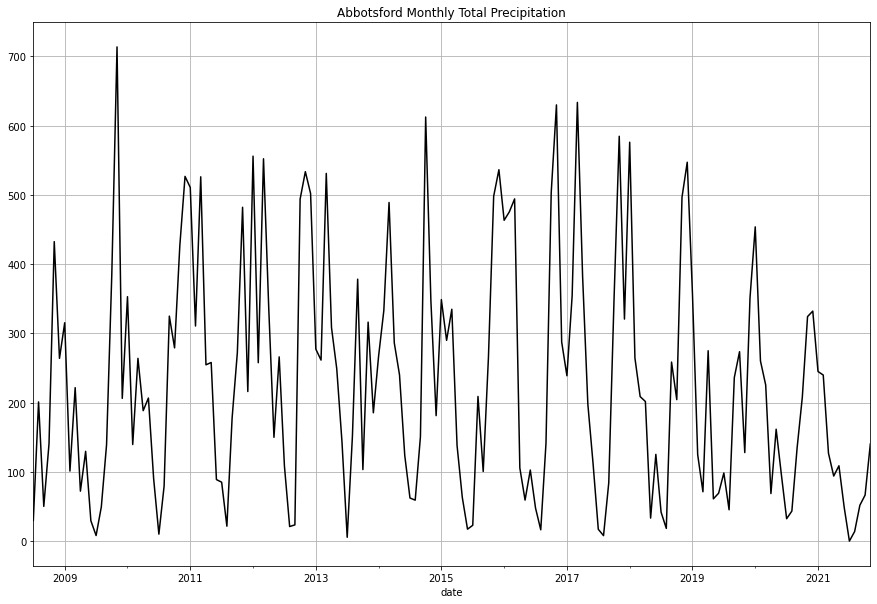

In [46]:
# Group by month and sum
city = df['city'][0]
grouped = df.groupby(pd.Grouper(key='date', freq='M')).sum()

grouped['precip'].plot(title=f'{city} Monthly Total Precipitation',
                       style='k-',
                      figsize=(15,10),
                      grid=True)
plt.savefig(f'{city}MonthlyTotalPrecip')

In [25]:
plt.savefig('LyttonMonthlyTotalPrecip')

<Figure size 432x288 with 0 Axes>

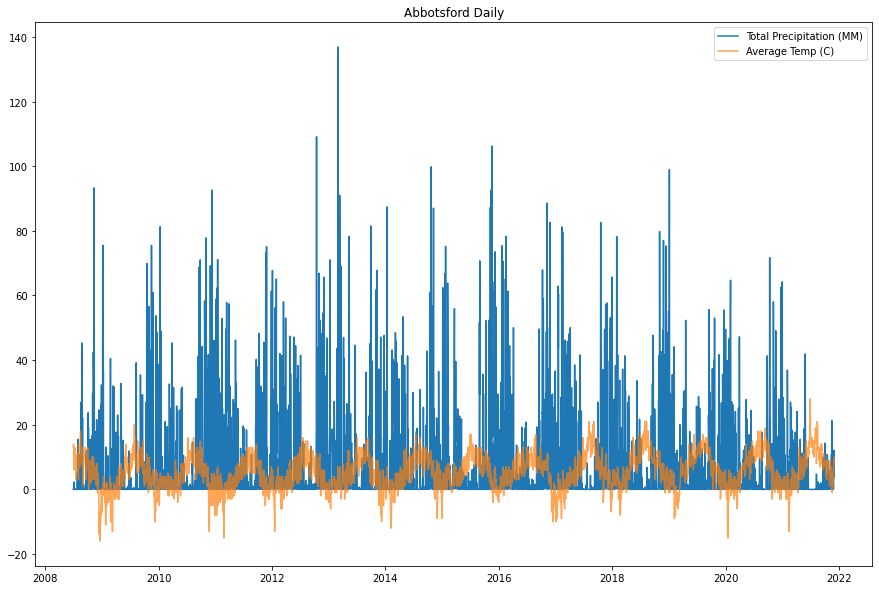

In [181]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(df['precip'], label='Total Precipitation (MM)' )
ax.fill_between(df.index, df['precip'])
ax.plot(df['avgtempC'], label='Average Temp (C)', alpha=0.7)
ax.set_title('Abbotsford Daily')
plt.legend()
plt.show()


In [147]:
plt.savefig('AbbotsfordDaily')

<Figure size 432x288 with 0 Axes>

In [199]:
df

,date,maxtempC,mintempC,avgtempC,precip,totalSnow_cm
0,2008-07-01,27,6,20,0.3,0.0
1,2008-07-02,28,3,21,0.0,0.0
2,2008-07-03,16,6,13,10.3,0.0
3,2008-07-04,15,3,10,1.1,0.0
4,2008-07-05,19,3,12,1.0,0.0
...,...,...,...,...,...,...
4896,2021-11-26,4,-3,1,1.7,0.2
4897,2021-11-27,2,-3,0,0.4,0.0
4898,2021-11-28,4,-2,2,0.6,0.0
4899,2021-11-29,4,-6,1,0.2,0.0


In [47]:
# load dataframe from file
df = pd.read_csv('data/abbotsford_weather.csv', parse_dates=['date'])

df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year



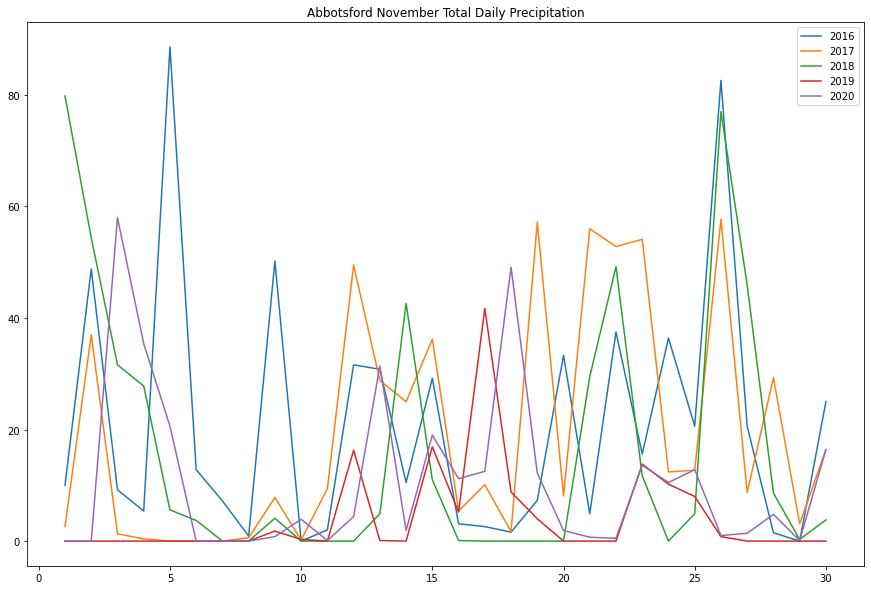

In [55]:
fig, ax = plt.subplots(figsize = (15,10))
for year in range(2016,2021):
    df1 = df[(df['month'] == 11) & (df['year'] == year)]
    city = df['city'][0]
    

    ax.plot('day', 'precip', label=year, data= df1 )
    # ax.plot(df1['day'], df1['maxtempC'], c='red', label='Max Temp (C)', alpha=0.5 )
    # ax.plot(df1['day'], df1['mintempC'], c='green', label='Min Temp (C)', alpha=.5)
    # ax.plot(df1['day'], df1['avgtempC'], c='black',label='Average Temp (C)', alpha=0.9)


ax.set_title(f'{city} November Total Daily Precipitation')
plt.legend()
plt.show()
